# Chapter 8

#### 8.1: How many years it takes for there to be a 95% probability of experiencing a 100-year flood?

Eq. 8.2: 
$$P(n, p)=\frac {p(1-q^n)}{1-q}=1-q^n$$

##### Answer:
We'll assign $p=0.01$ and $q=0.99$. We aim to find $n$ so that $P(n, p)=0.95$:

$P(n, p)=1-q^n=0.95 \Rightarrow q^n=0.05 \Rightarrow \log_q 0.05 = n$

In [16]:
import math
import random
import matplotlib.pyplot as plt
import seaborn

In [2]:
q=0.99
base = q
n = math.log(0.05,base)
print(n)

298.07285221322263


We can see that $n=298$, so it will take 298 years to reach a probability of 95% for the 100-years flood.

#### 8.2: A coastal area has not been struck by a hurricane in 28 out of 46 years. Assuming that the incidence of hurricanes is described by a Poisson distribution (equation 8.17), estimate its mean parameter μ. In how many years would you expect one hurricane?

Eq. 8.17:
$$ P(m, \mu)=\frac{\mu^m e^{-\mu}}{m!} $$

##### Answer:
We'll assume that the coast **HAS BEEN STRUCK** by a hurricane in the ramining years (18 out of 46), so the average number of hurricanes per year - $\mu$ - is: 

$$\mu = \frac {Hurricanes}{Year} = \frac{18}{46} = 0.39$$

Since we have 0.39 hurricanes per year, we would expect, on average, 1 hurricane every 3 years ($0.39\times 3 > 1$).

In [3]:
mu = 18.0/46.0
print(mu)

0.391304347826087


#### 8.3: Give an example you have encountered of the “gambler’s fallacy” and explain why it is wrong.

##### Answer:
A classical exmaple would be the popular idea that the chances to win a round in a slot machine goes up with the number of rounds played without a win (i.e., the machine is getting "hot"). **If** we believe the makers of such machines, the odds are equal for every round - regardless of previous results - making the practice of "machine lurking" quite supersticious.

#### 8.4: Of the two time-dependent probability models in Figure 8.4, which looks more like an earthquake cycle model and why? What physical situation might the other describe?

<img src="/notebooks/OneDrive/Shahar Grad School/Courses/70543 - Earthquakes And Seismic Hazard/Final Project/fig_8.4.PNG" alt="Fig 8.4" title="Fig 8.4",width=600,height=600 />

##### Answer:
The lower model (larger dashes) looks more like an earthquake cycle: Following a series of events (possibly the mainshock-aftershock sequence) the probabilty a another event drops back to zero. Then, after some eventless period, the cycle begins again.
The upper model (smaller dashes) shows a tendency to increse the event probability with time/event occurence. This could describe a triggreing model, in which past events affect future earthquakes by shortening their period (rising their probabily).


#### 8.5: Britain’s Meterological Office' statements:
1. *The forecast for average UK rainfall slightly favours drier than average conditions for April-May-June, and slightly favours April being the driest of the three months.*
2. *Given that April was the wettest since detailed records began in 1910 and the April-May-June quarter was also the wettest, this advice was not helpful.*
3. *The probabilistic forecast can be considered as somewhat like a form guide for a horse race. It provides an insight into which outcomes are most likely, although in some cases there is a broad spread of outcomes, analogous to a race in which there is no strong favourite. Just as any of the horses in the race could win the race, any of the outcomes could occur, but some are more likely than others.*

How do you respond to these statements? What – if anything – would you suggest doing differently?

##### Answer:
Statements like this do not help the policy makers. In order to make an informed decision they should be provided with - if possible - a clear statement ("April-May-June **WILL** be drier then usuall by x%") or - if the data isn't strong enough - with the model's results in layman's terms ("There is a x% chance that April-May-June will be drier then usuall by y%, with z% certainty").

#### 8.6: Earthquake history & hazard
The synthetic time histories of earthquakes in the two lower panels of Figure 8.5 result from the same physical model, and differ only due to randomness. Imagine, however, that these were actual time histories of magnitude 6 earthquakes in different areas, and the 150-year time is today. Based on these data, how would you describe the earthquake history to residents of each area? What would you tell them about the earthquake hazard they face today?

<img src="/notebooks/OneDrive/Shahar Grad School/Courses/70543 - Earthquakes And Seismic Hazard/Final Project/fig_8.5.PNG" alt="Fig 8.5" title="Fig 8.5",width=600,height=600 />


##### Answer:
1. The upper line shows somewhat regular earthquake cycles in which every 20-30 years there are 2-3 magnitude 6 earthquakes in a 5 years span, followed again by another quiet period. Seeing that we are nearing the end of a quiet period there is a good chance for 2-3 magnitude 6 earthquakes in the near future.
2. The lower line shows an irregular earthquakes regime: the events may be temporaly close (1-2 years apart) or sparse (10 year apart) followed by some quiet period. There no way of predicting when the next earthquake will be, nor if it will be a solitary event or a part of dense pattern.


#### 8.7: Synthetic time histories of earthquakes

##### Answer:
We'll assign 200 years as the timespan ($n$) and the time-indipandent probabily of an event ($p$) as $\frac{1}{20}$.
For each year we'll generate a random number between 0 and 1, and if this number is smaller than $p$ then an event did occur that year. We'll repeat the process 3 times, just to have something to compare.

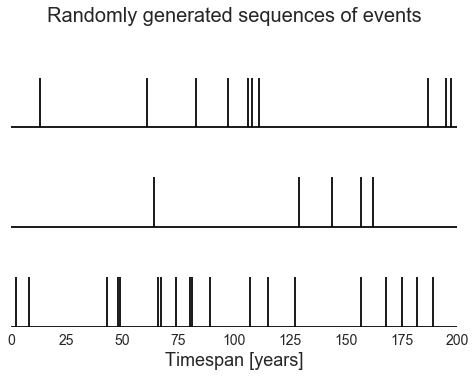

In [218]:
# generate random events
n = 200
p = 1/20.0
num_graphs = 3

# create a list of n lists filled with zeroes
multi_list = [[0 for g in range(num_graphs)] for y in range(n)]

# randomly place events (value=1) if their probabilty is smaller than p
for i in range(num_graphs):
    for year in range(n):
        if random.random() <= p:
            multi_list[year][i] = 1

# plot events
fig = plt.figure()
ax = fig.add_subplot(111)
# plot's properties
min_x = 0
max_x = n
plt.ylim(0,num_graphs * 0.2)
plt.xlim(min_x,max_x)
plt.title("Randomly generated sequences of events", fontsize=20)
plt.xlabel("Timespan [years]", fontsize=18)
plt.xticks(fontsize=14)
ax.yaxis.set_visible(False)
# remove frame from graph
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# plot the different grpahs
for grph in range(num_graphs):
    plt.hlines(grph * 0.2,min_x,max_x)
    min_y = grph * 0.2
    max_y = min_y + 0.1
    graph_location = [x for x,v in enumerate(multi_list) if multi_list[x][grph]]
    plt.vlines(graph_location,ymin=min_y, ymax=max_y)

plt.show()

As we can see, these are clearlly random results that can be interperted as different earthquakes regims: While the top graph shows earthquakes that are grouped together with long (50+ years) quiet perios and $p=\frac{1}{20}$ , the bottom graph shows a much denser event occurence - $p \approx \frac{1}{10}$ . Furthermore, the middle graph doesn't look cyclic at all and here $p=\frac{1}{40}$ with about 75 years between the grouped events.